<a href="https://colab.research.google.com/github/remy-nguyen-binh/Canada-Rental-Property-Management-Analysis/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [8]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['canada_rental_property_management.csv']))


Saving canada_rental_property_management.csv to canada_rental_property_management.csv


In [9]:
# Check for missing values
df.isnull().sum()

,0
Property_ID,0
Location,0
Property_Type,0
Monthly_Rent,0
Vacancy_Status,0
Square_Footage,0
Bedrooms,0
Bathrooms,0
Date_Added,0
Lease_Length_Months,0


In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
# Check unique values in Location
df['Location'].unique()

array(['Montreal', 'Vancouver', 'Winnipeg', 'Ottawa', 'Toronto',
       'Halifax', 'Calgary', 'Edmonton'], dtype=object)

In [16]:
# Check for outliers using IQR
Q1 = df['Monthly_Rent'].quantile(0.25)
Q3 = df['Monthly_Rent'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Remove rows where Bedrooms or Bathrooms are invalid
df = df[(df['Bedrooms'] > 0) & (df['Bathrooms'] > 0)]

In [18]:
# Check for invalid satisfaction scores
df = df[(df['Satisfaction_Score'] >= 1) & (df['Satisfaction_Score'] <= 10)]

In [20]:
# Calculate price per square foot
df['Price_Per_Square_Foot'] = df['Monthly_Rent'] / df['Square_Footage']

In [22]:
# Exploratory Data Analysis
# Basic statistics of numerical columns
print(df.describe())

       Property_ID  Monthly_Rent  Square_Footage     Bedrooms    Bathrooms  \
count  1000.000000   1000.000000     1000.000000  1000.000000  1000.000000   
mean    500.500000   2339.017000     2152.283000     2.531000     1.977000   
std     288.819436    936.902861     1096.981632     1.112779     0.816785   
min       1.000000    800.000000      302.000000     1.000000     1.000000   
25%     250.750000   1511.750000     1152.750000     2.000000     1.000000   
50%     500.500000   2301.500000     2225.000000     3.000000     2.000000   
75%     750.250000   3157.500000     3149.500000     4.000000     3.000000   
max    1000.000000   3998.000000     3979.000000     4.000000     3.000000   

       Lease_Length_Months  Tenant_Income  Maintenance_Cost  Property_Age  \
count          1000.000000    1000.000000       1000.000000   1000.000000   
mean             20.425000    7238.971000        540.016000     49.405000   
std               8.657443    2790.781676        261.915172     27

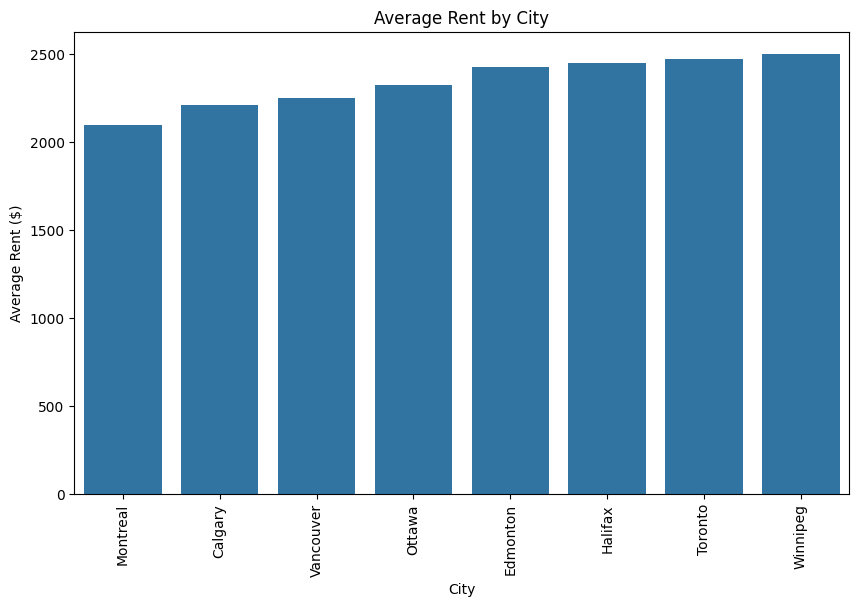

In [25]:
# Average rent by city
avg_rent_city = df.groupby('Location')['Monthly_Rent'].mean().sort_values()

# Plotting average rent by city
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rent_city.index, y=avg_rent_city.values)
plt.title('Average Rent by City')
plt.xlabel('City')
plt.ylabel('Average Rent ($)')
plt.xticks(rotation=90)
plt.show()


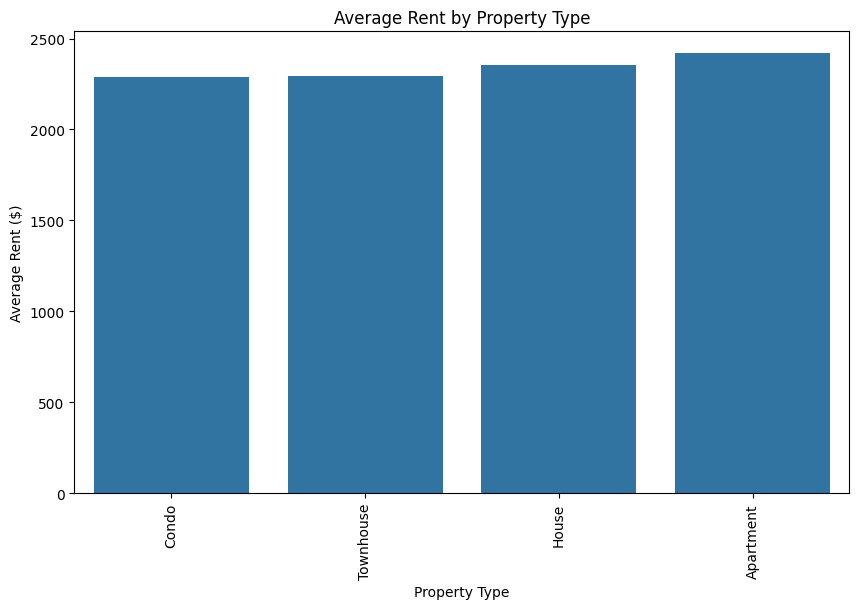

In [28]:
# Average rent by property type
avg_rent_type = df.groupby('Property_Type')['Monthly_Rent'].mean().sort_values()

# Plotting average rent by property type
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rent_type.index, y=avg_rent_type.values)
plt.title('Average Rent by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Rent ($)')
plt.xticks(rotation=90)
plt.show()

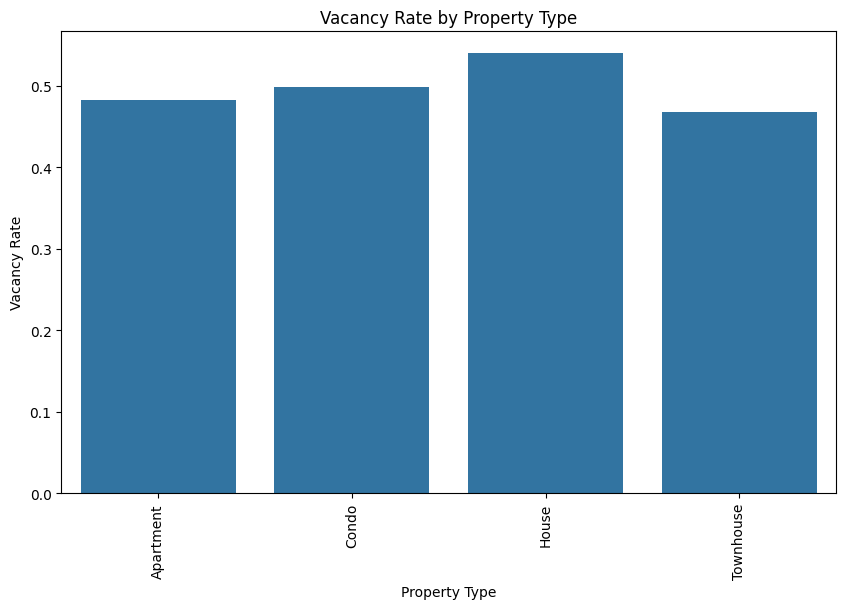

In [31]:
# Create a new column for vacancy rate (1 if vacant, 0 if occupied)
df['Vacant'] = df['Vacancy_Status'].apply(lambda x: 1 if x == 'Vacant' else 0)

# Vacancy rate by property type
vacancy_rate_type = df.groupby('Property_Type')['Vacant'].mean()

# Vacancy rate by location
vacancy_rate_location = df.groupby('Location')['Vacant'].mean()

# Plot Vacancy rate by Property Type
plt.figure(figsize=(10,6))
sns.barplot(x=vacancy_rate_type.index, y=vacancy_rate_type.values)
plt.title('Vacancy Rate by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=90)
plt.show()



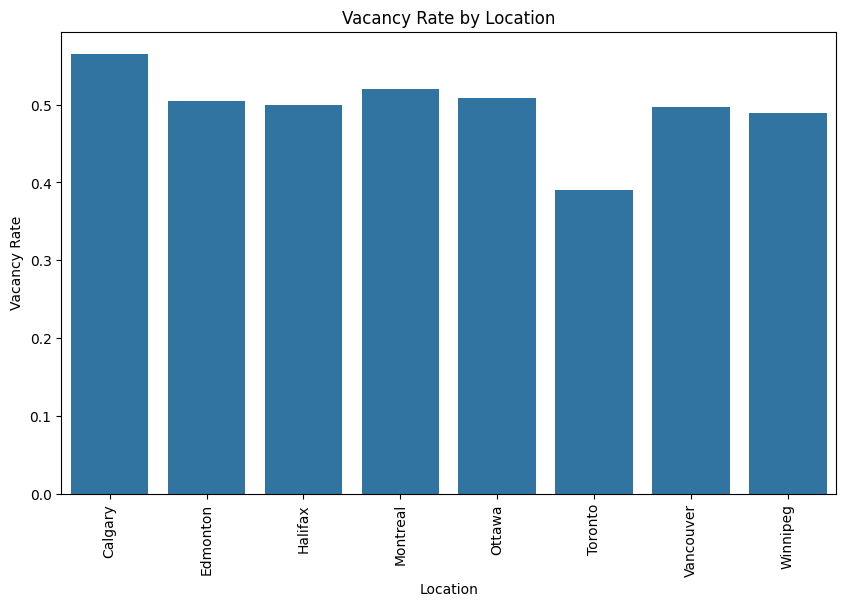

In [32]:
# Plot Vacancy rate by Location
plt.figure(figsize=(10,6))
sns.barplot(x=vacancy_rate_location.index, y=vacancy_rate_location.values)
plt.title('Vacancy Rate by Location')
plt.xlabel('Location')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=90)
plt.show()

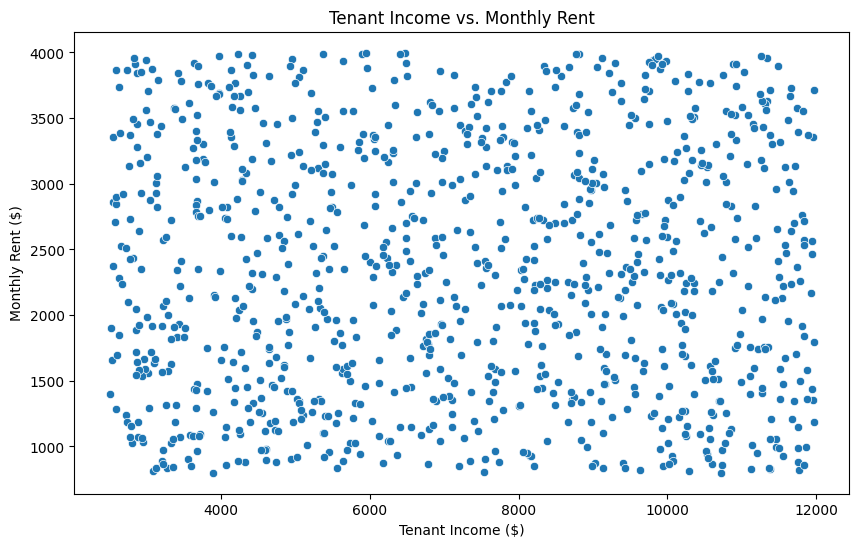

In [33]:
# Correlation between Tenant Income and Monthly Rent
plt.figure(figsize=(10,6))
sns.scatterplot(x='Tenant_Income', y='Monthly_Rent', data=df)
plt.title('Tenant Income vs. Monthly Rent')
plt.xlabel('Tenant Income ($)')
plt.ylabel('Monthly Rent ($)')
plt.show()

In [34]:
# Calculate Pearson correlation
corr_income_rent = df['Tenant_Income'].corr(df['Monthly_Rent'])
print(f"Correlation between Tenant Income and Monthly Rent: {corr_income_rent}")

Correlation between Tenant Income and Monthly Rent: 0.007890681355762241


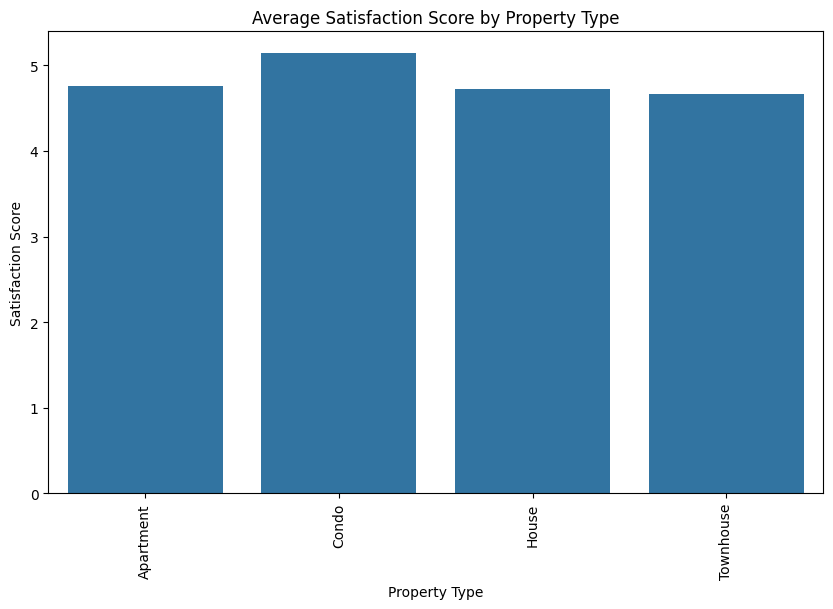

In [36]:
# Average Satisfaction Score by Property Type
avg_satisfaction_type = df.groupby('Property_Type')['Satisfaction_Score'].mean()

# Plotting satisfaction by property type
plt.figure(figsize=(10,6))
sns.barplot(x=avg_satisfaction_type.index, y=avg_satisfaction_type.values)
plt.title('Average Satisfaction Score by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=90)
plt.show()

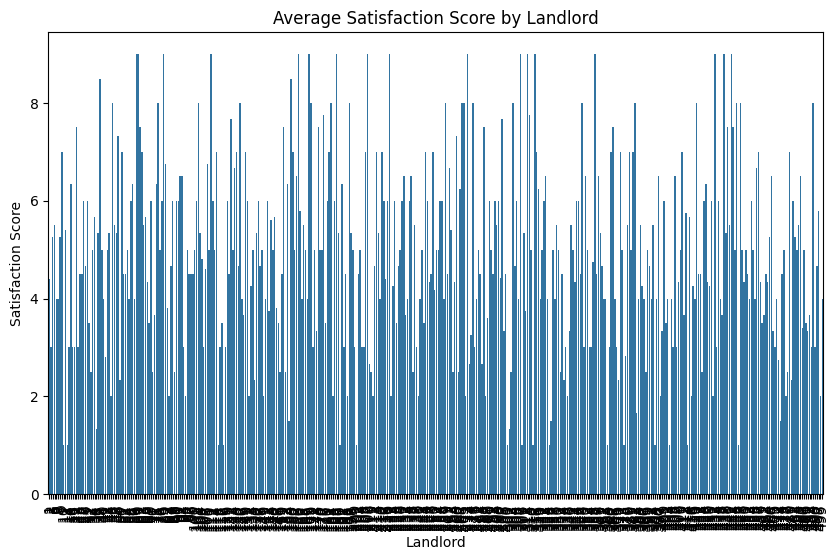

In [38]:
# Average Satisfaction Score by Landlord
avg_satisfaction_landlord = df.groupby('Landlord_ID')['Satisfaction_Score'].mean()

# Plotting satisfaction by landlord
plt.figure(figsize=(10,6))
sns.barplot(x=avg_satisfaction_landlord.index, y=avg_satisfaction_landlord.values)
plt.title('Average Satisfaction Score by Landlord')
plt.xlabel('Landlord')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=90)
plt.show()


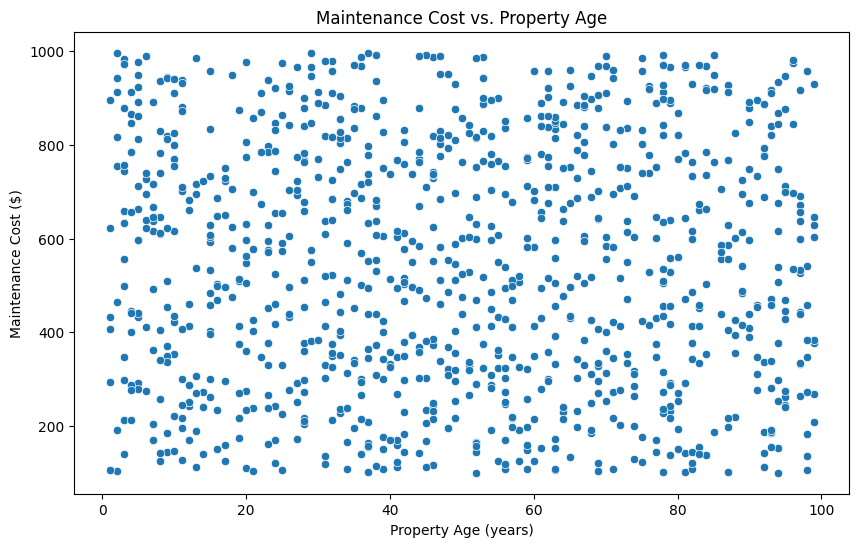

In [39]:
# Scatter plot for Maintenance Cost vs. Property Age
plt.figure(figsize=(10,6))
sns.scatterplot(x='Property_Age', y='Maintenance_Cost', data=df)
plt.title('Maintenance Cost vs. Property Age')
plt.xlabel('Property Age (years)')
plt.ylabel('Maintenance Cost ($)')
plt.show()


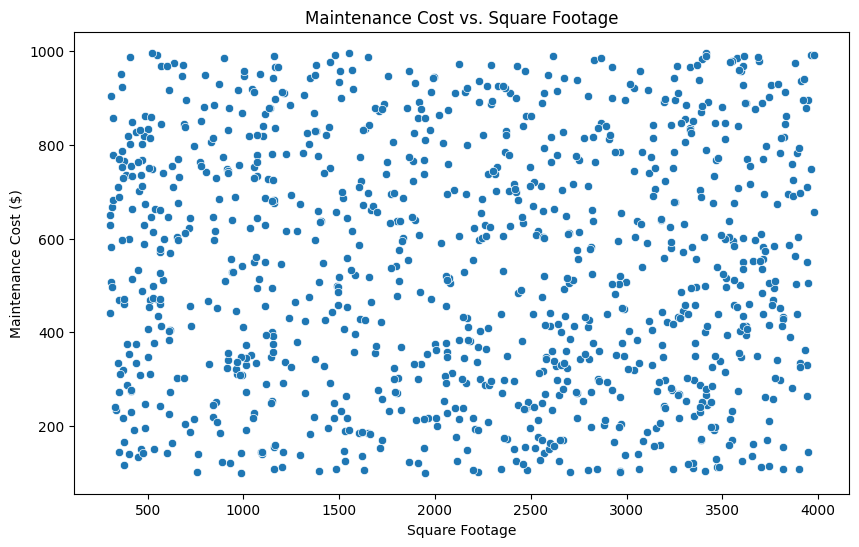

In [40]:
# Scatter plot for Maintenance Cost vs. Property Size (Square Footage)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Square_Footage', y='Maintenance_Cost', data=df)
plt.title('Maintenance Cost vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Maintenance Cost ($)')
plt.show()


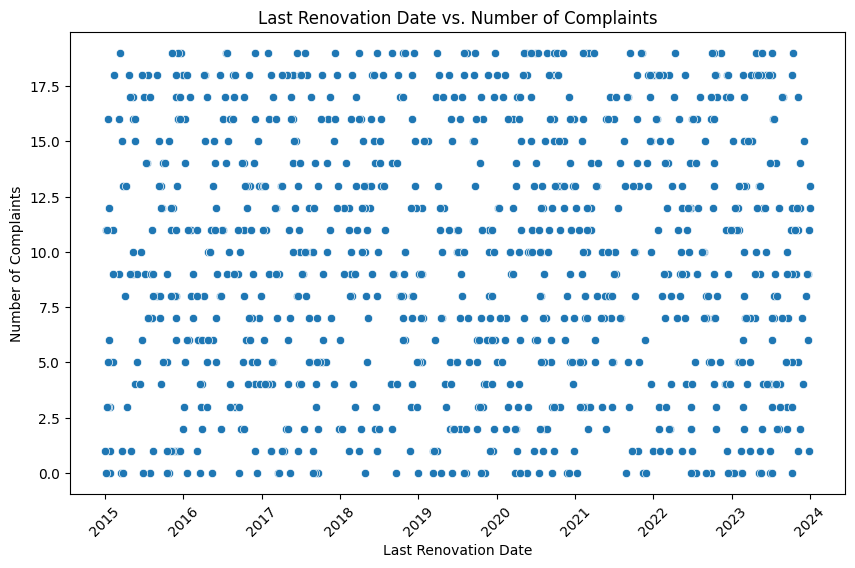

In [42]:
# Convert 'Last_Renovation_Date' to datetime
df['Last_Renovation_Date'] = pd.to_datetime(df['Last_Renovation_Date'])

# Scatter plot for Last Renovation Date vs. Complaints
plt.figure(figsize=(10,6))
sns.scatterplot(x='Last_Renovation_Date', y='Complaint_Count', data=df)
plt.title('Last Renovation Date vs. Number of Complaints')
plt.xlabel('Last Renovation Date')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()
